<a href="https://colab.research.google.com/github/Katla19/yulu-hypothesis-Testing/blob/main/Yulu_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr
from scipy.stats import f_oneway, pearsonr, shapiro

In [ ]:
df=pd.read_csv("yulu.csv")

In [ ]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
sum_of_counts = df['count'].sum()
print(f"The sum of counts is: {sum_of_counts}")

The sum of counts is: 2085476


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaN,NaN,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaN,NaN,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaN,NaN,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaN,NaN,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
temp,10886.0,NaN,NaN,NaN,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaN,NaN,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


In [ ]:
a = pd.to_datetime(df['datetime'])
print(a.dt.year.unique())

[2011 2012]


In [ ]:
df.skew(numeric_only = True)

,0
season,-0.007076
holiday,5.660517
workingday,-0.776163
weather,1.243484
temp,0.003691
atemp,-0.102560
humidity,-0.086335
windspeed,0.588767
casual,2.495748
registered,1.524805


<ipython-input-12-072454a3c2a2>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  casual_data = df_resampled.set_index('datetime').resample('M')['casual'].sum()
<ipython-input-12-072454a3c2a2>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  registered_data = df_resampled.set_index('datetime').resample('M')['registered'].sum()
<ipython-input-12-072454a3c2a2>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  count_data = df_resampled.set_index('datetime').resample('M')['count'].sum()


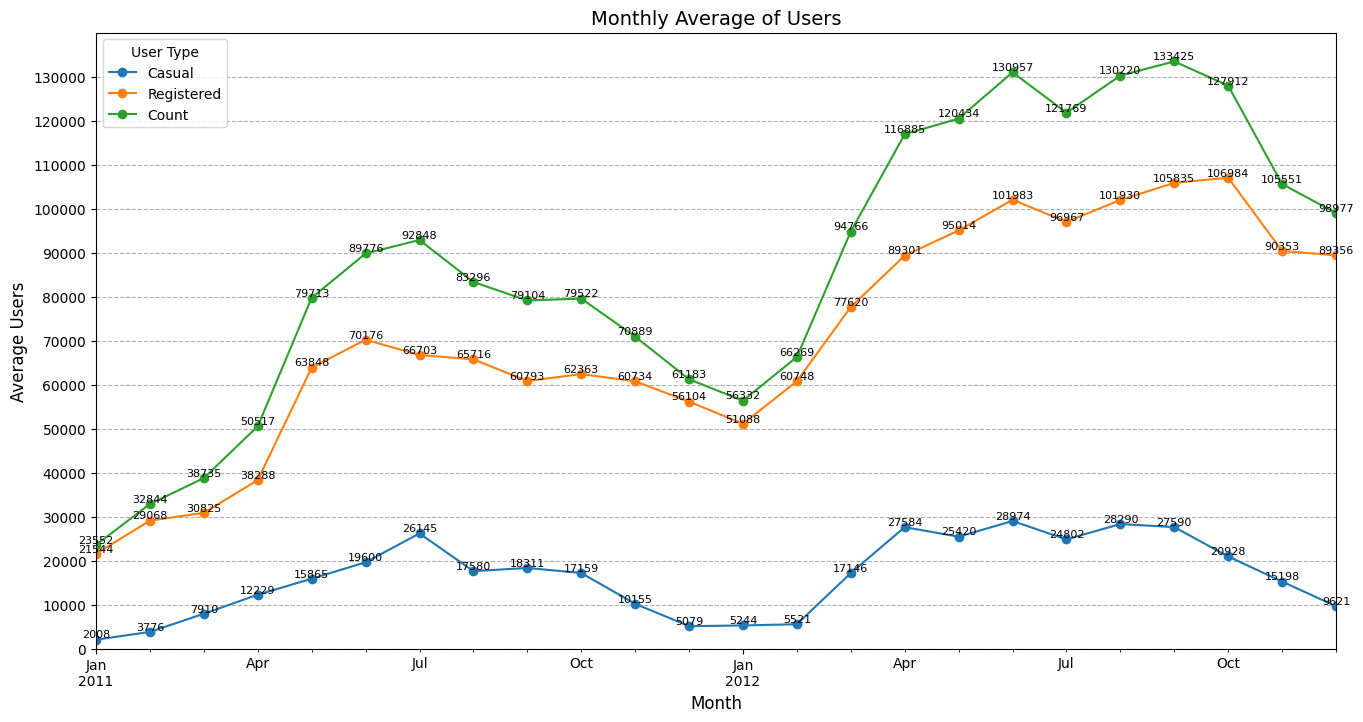

In [ ]:
df_resampled = df.copy()
df_resampled['datetime'] = pd.to_datetime(df_resampled['datetime'])
plt.figure(figsize=(16, 8))
casual_data = df_resampled.set_index('datetime').resample('M')['casual'].sum()
casual_data.plot(kind='line', label='Casual', marker='o')
for x, y in zip(casual_data.index, casual_data):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
registered_data = df_resampled.set_index('datetime').resample('M')['registered'].sum()
registered_data.plot(kind='line', label='Registered', marker='o')
for x, y in zip(registered_data.index, registered_data):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
count_data = df_resampled.set_index('datetime').resample('M')['count'].sum()
count_data.plot(kind='line', label='Count', marker='o')
for x, y in zip(count_data.index, count_data):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.yticks(np.arange(0, 140000, 10000))
plt.ylim(0,)
plt.legend(title='User Type')
plt.title("Monthly Average of Users", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Users", fontsize=12)
plt.show()

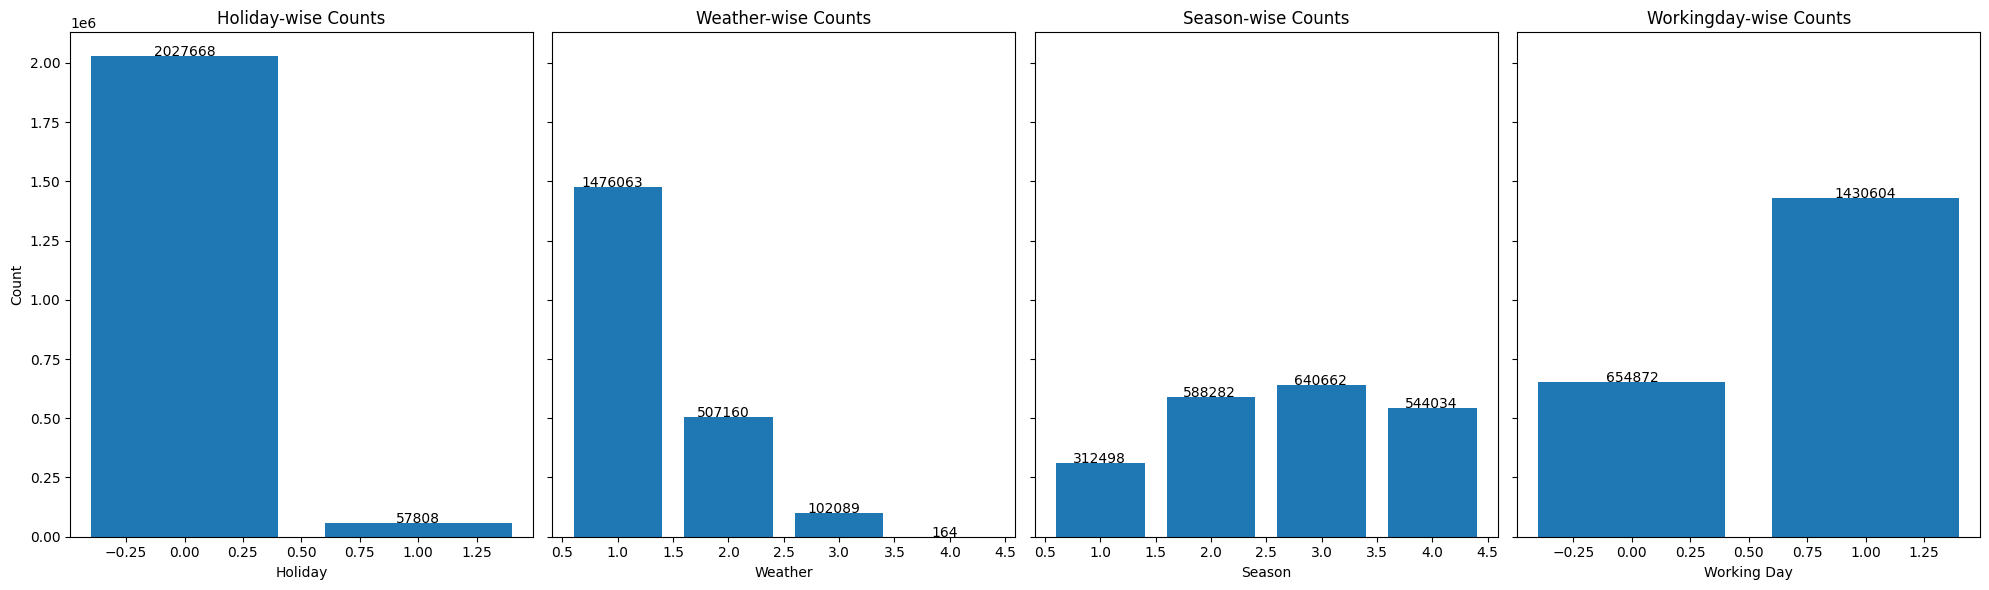

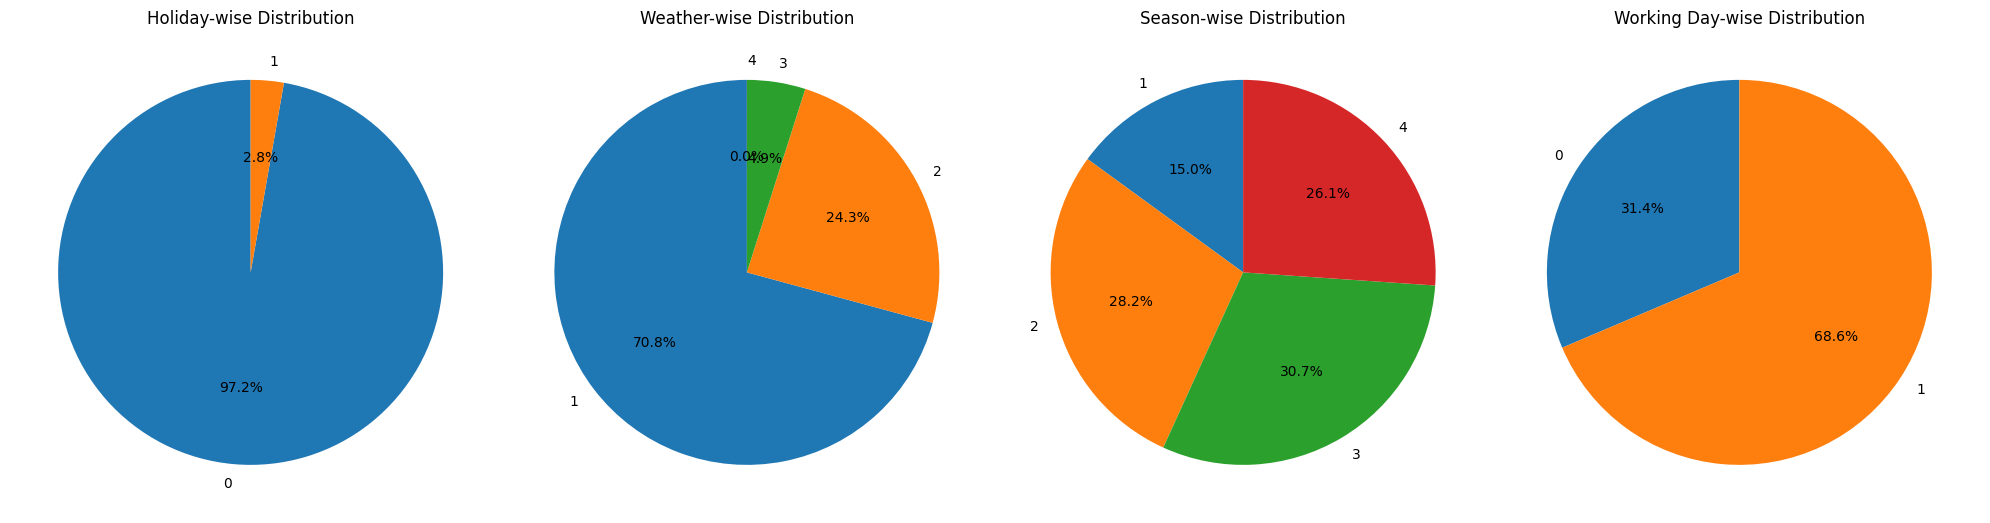

In [ ]:
holiday_counts = df.groupby('holiday')['count'].sum()
weather_counts = df.groupby('weather')['count'].sum()
season_counts = df.groupby('season')['count'].sum()
workingday_counts = df.groupby('workingday')['count'].sum()
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
# Holiday-wise counts
axes[0].bar(holiday_counts.index, holiday_counts.values)
axes[0].set_title('Holiday-wise Counts')
axes[0].set_xlabel('Holiday')
axes[0].set_ylabel('Count')
for i, v in enumerate(holiday_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center')
# Weather-wise counts
axes[1].bar(weather_counts.index, weather_counts.values)
axes[1].set_title('Weather-wise Counts')
axes[1].set_xlabel('Weather')
for i, v in enumerate(weather_counts.values):
    axes[1].text(i+0.95, v + 50, str(v), ha='center')
# Season-wise counts
axes[2].bar(season_counts.index, season_counts.values)
axes[2].set_title('Season-wise Counts')
axes[2].set_xlabel('Season')
for i, v in enumerate(season_counts.values):
    axes[2].text(i+0.75, v, str(v), ha='left')
# Workingday-wise counts
axes[3].bar(workingday_counts.index, workingday_counts.values)
axes[3].set_title('Workingday-wise Counts')
axes[3].set_xlabel('Working Day')
for i, v in enumerate(workingday_counts.values):
    axes[3].text(i, v , str(v), ha='center')
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
axes[0].pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Holiday-wise Distribution')
axes[1].pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Weather-wise Distribution')
axes[2].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Season-wise Distribution')
axes[3].pie(workingday_counts, labels=workingday_counts.index, autopct='%1.1f%%', startangle=90)
axes[3].set_title('Working Day-wise Distribution')
plt.tight_layout()
plt.show()


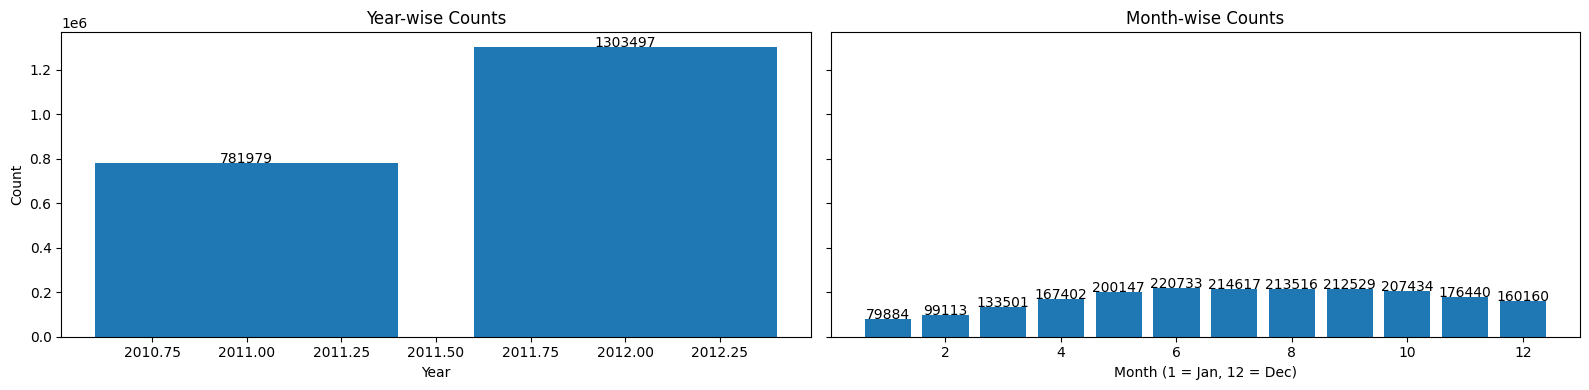

In [ ]:
a= pd.to_datetime(df['datetime'])
yearly_counts = df.groupby(a.dt.year)['count'].sum()
monthly_counts = df.groupby(a.dt.month)['count'].sum()
fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
axes[0].bar(yearly_counts.index, yearly_counts.values)
axes[0].set_title('Year-wise Counts')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
for i, v in enumerate(yearly_counts.values):
    axes[0].text(yearly_counts.index[i], v, str(v), ha='center')
axes[1].bar(monthly_counts.index, monthly_counts.values)
axes[1].set_title('Month-wise Counts')
axes[1].set_xlabel('Month (1 = Jan, 12 = Dec)')
for i, v in enumerate(monthly_counts.values):
    axes[1].text(monthly_counts.index[i], v , str(v), ha='center')
plt.tight_layout()
plt.show()


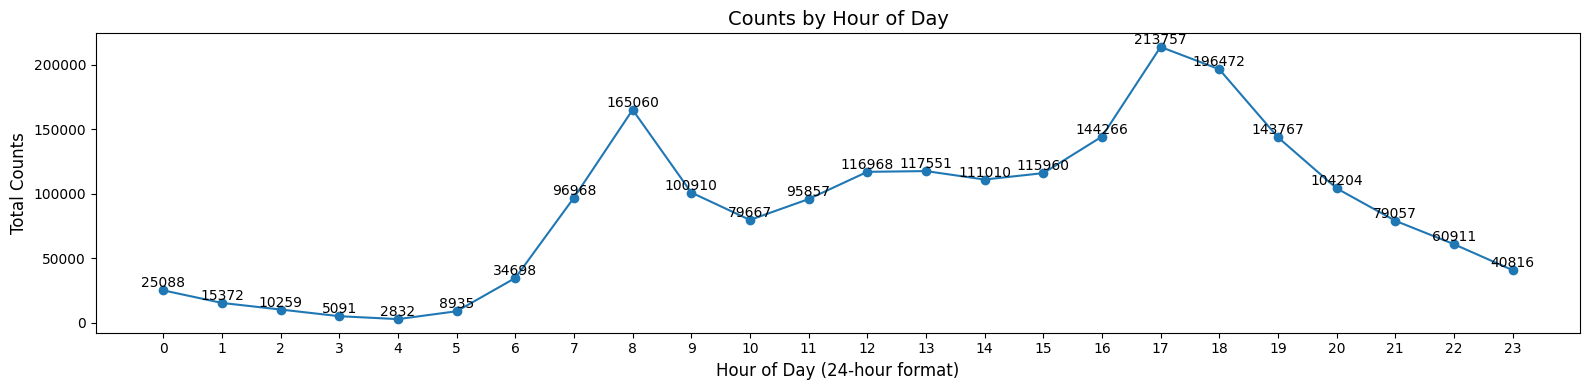

In [ ]:
hours = pd.to_datetime(df['datetime']).dt.hour
hourly_counts = df.groupby(hours)['count'].sum()
plt.figure(figsize=(16, 4))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-')
for i, count in enumerate(hourly_counts.values):
    plt.text(hourly_counts.index[i], count, str(count), ha='center', va='bottom', fontsize=10)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Total Counts', fontsize=12)
plt.title('Counts by Hour of Day', fontsize=14)
plt.xticks(hourly_counts.index)
plt.tight_layout()
plt.show()


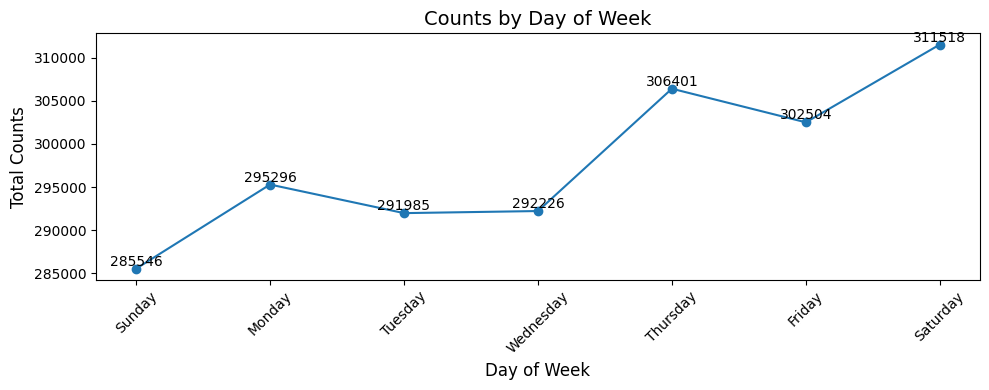

In [ ]:
day_names = pd.to_datetime(df['datetime']).dt.day_name()
daywise_counts = df.groupby(day_names)['count'].sum()
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daywise_counts = daywise_counts.reindex(ordered_days)
plt.figure(figsize=(10, 4))
plt.plot(daywise_counts.index, daywise_counts.values, marker='o', linestyle='-')
for i, count in enumerate(daywise_counts.values):
    plt.text(daywise_counts.index[i], count, str(count), ha='center', va='bottom', fontsize=10)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Counts', fontsize=12)
plt.title('Counts by Day of Week', fontsize=14)
plt.xticks(daywise_counts.index, rotation=45)
plt.tight_layout()
plt.show()


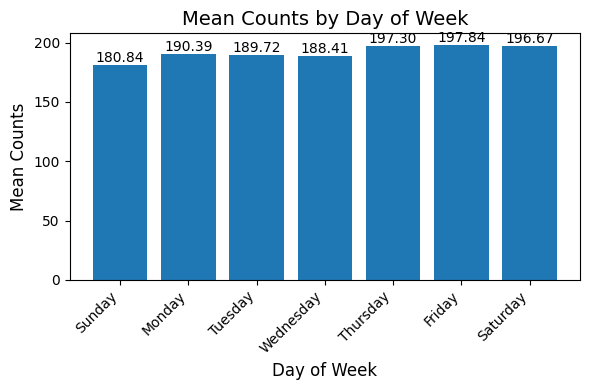

In [ ]:
daywise_counts = df.groupby(day_names)['count'].mean()
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daywise_counts = daywise_counts.reindex(ordered_days)
plt.figure(figsize=(6, 4))
plt.bar(daywise_counts.index, daywise_counts.values)
for i, count in enumerate(daywise_counts.values):
    plt.text(i, count, f'{count:.2f}', ha='center', va='bottom')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Mean Counts', fontsize=12)
plt.title('Mean Counts by Day of Week', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

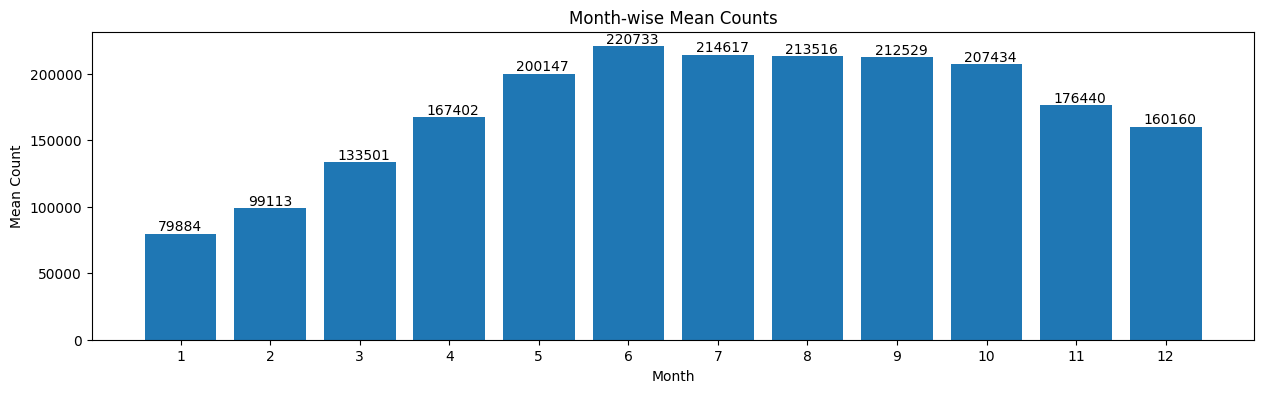

In [ ]:
plt.figure(figsize=(15, 4))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel("Month")
plt.ylabel("Mean Count")
plt.title("Month-wise Mean Counts")
plt.xticks(monthly_counts.index)
for i, v in enumerate(monthly_counts.values):
    plt.text(i+0.75, v, str(round(v,2)), ha='left', va='bottom')
plt.show()

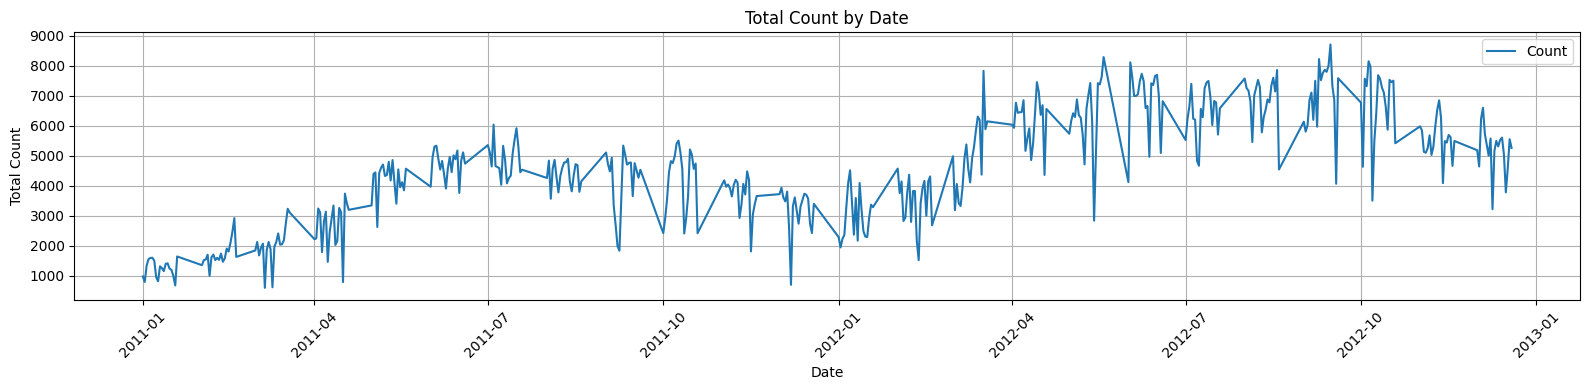

In [ ]:
df_copy = df.copy()
df_copy['datetime'] = pd.to_datetime(df_copy['datetime'])
df_copy['date'] = df_copy['datetime'].dt.date
df_grouped = df_copy.groupby('date')['count'].sum().reset_index()
plt.figure(figsize=(16, 4))
plt.plot(df_grouped['date'], df_grouped['count'], label='Count')
plt.title('Total Count by Date')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

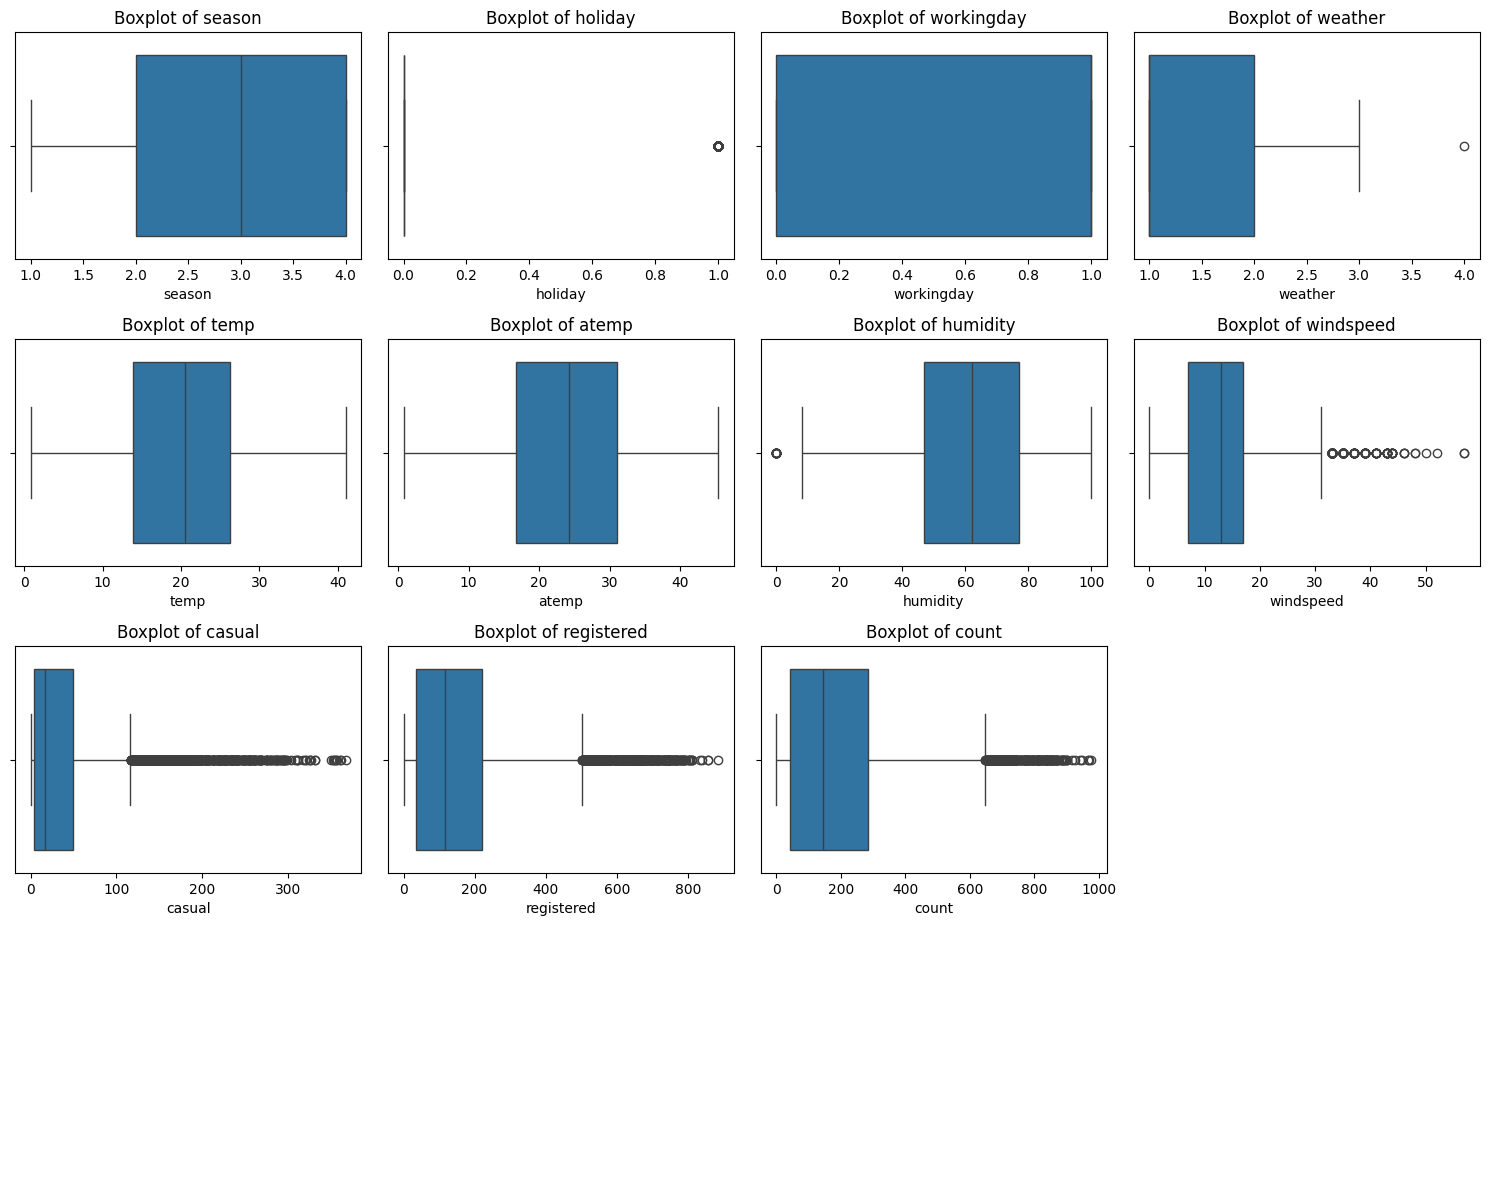

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
for i in range(len(numeric_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

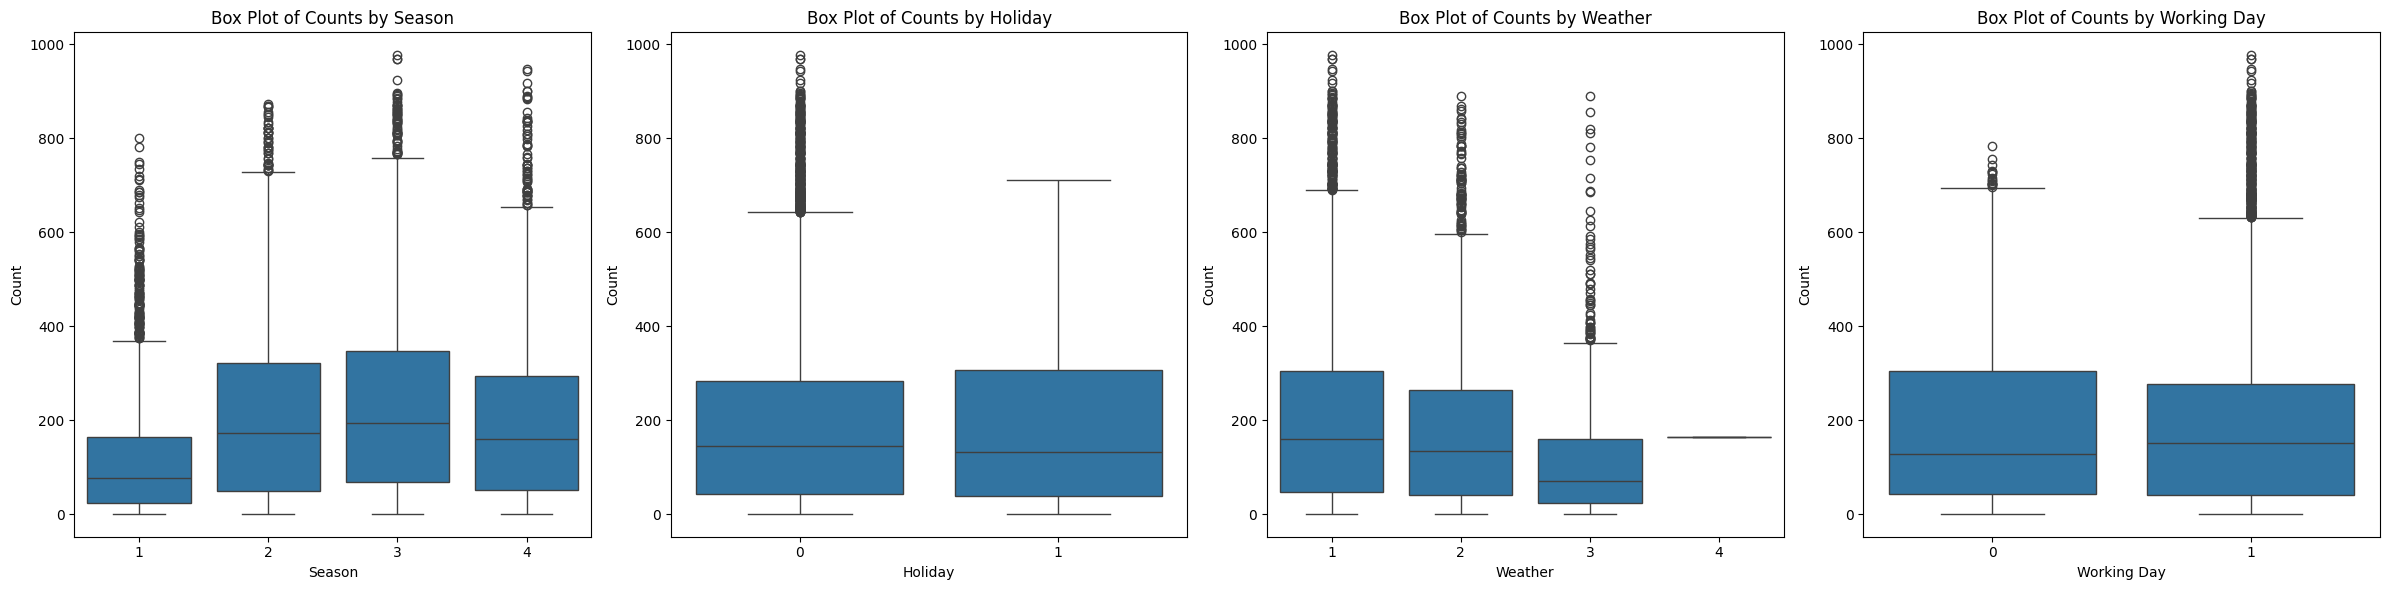

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
sns.boxplot(x='season', y='count', data=df, ax=axes[0])
axes[0].set_title('Box Plot of Counts by Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Count')
sns.boxplot(x='holiday', y='count', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Counts by Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Count')
sns.boxplot(x='weather', y='count', data=df, ax=axes[2])
axes[2].set_title('Box Plot of Counts by Weather')
axes[2].set_xlabel('Weather')
axes[2].set_ylabel('Count')
sns.boxplot(x='workingday', y='count', data=df, ax=axes[3])
axes[3].set_title('Box Plot of Counts by Working Day')
axes[3].set_xlabel('Working Day')
axes[3].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Focus on correlation with 'count'
correlation_with_count = correlation_matrix['count'].sort_values(ascending=False)
print("Correlation with Count")
print(correlation_with_count)

Correlation with Count
count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


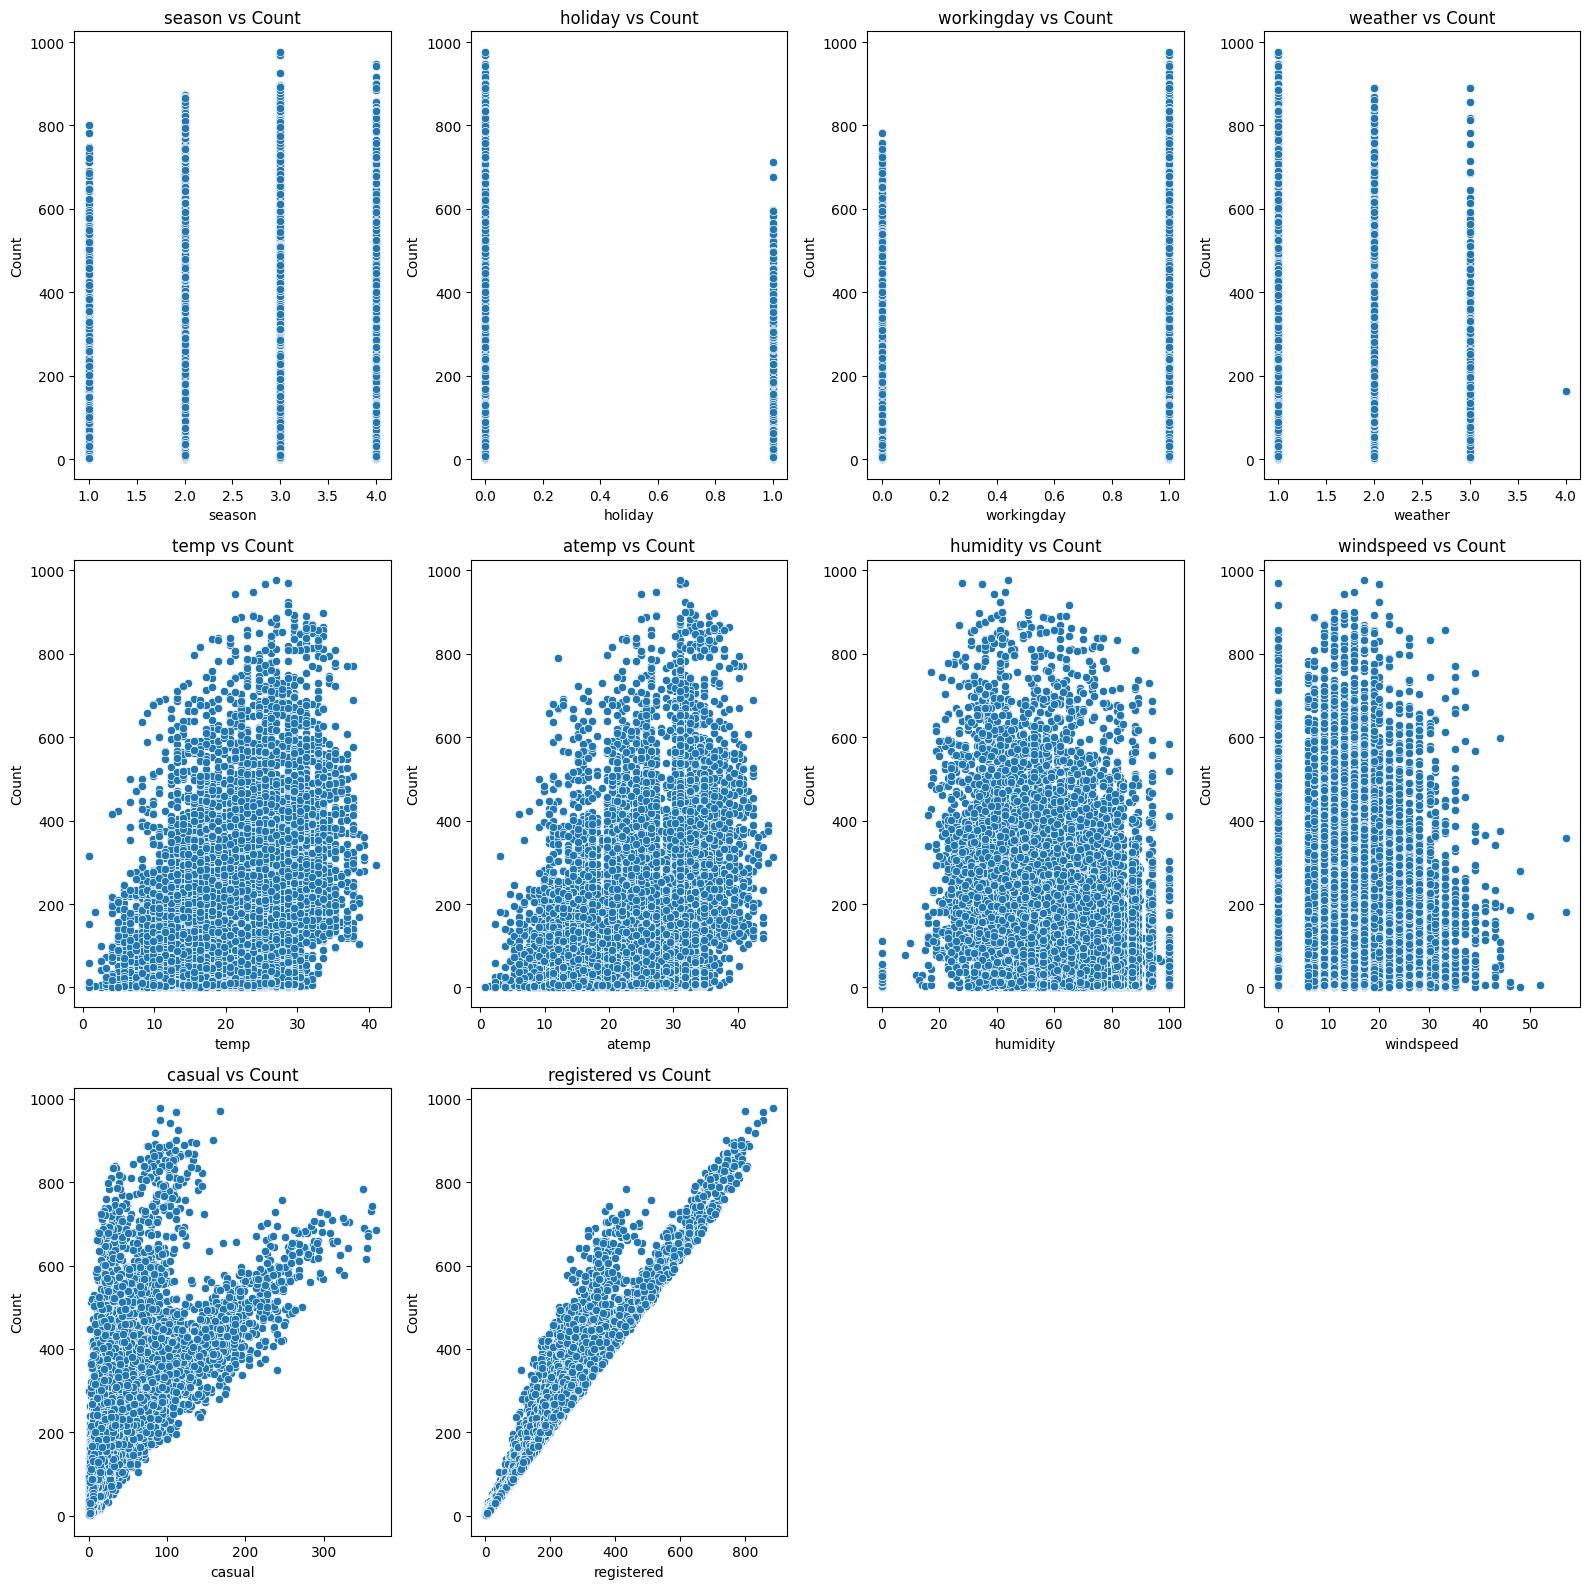

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('count')
fig, axes = plt.subplots(3,4, figsize=(16, 16))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=df[column], y=df['count'], ax=axes[i])
    axes[i].set_title(f'{column} vs Count')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

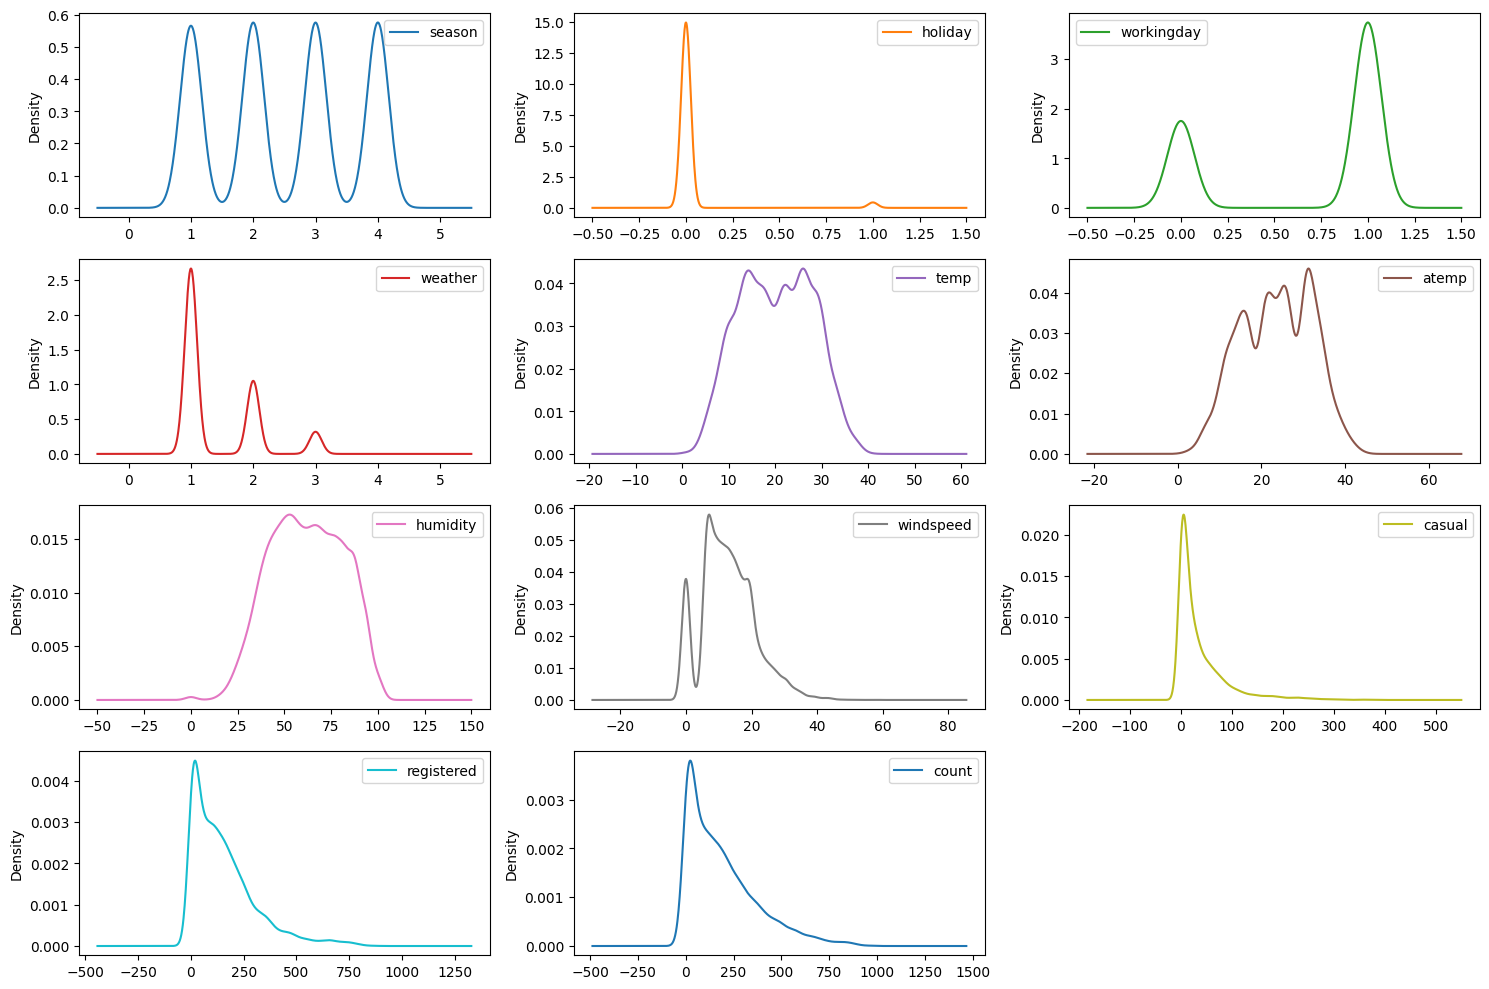

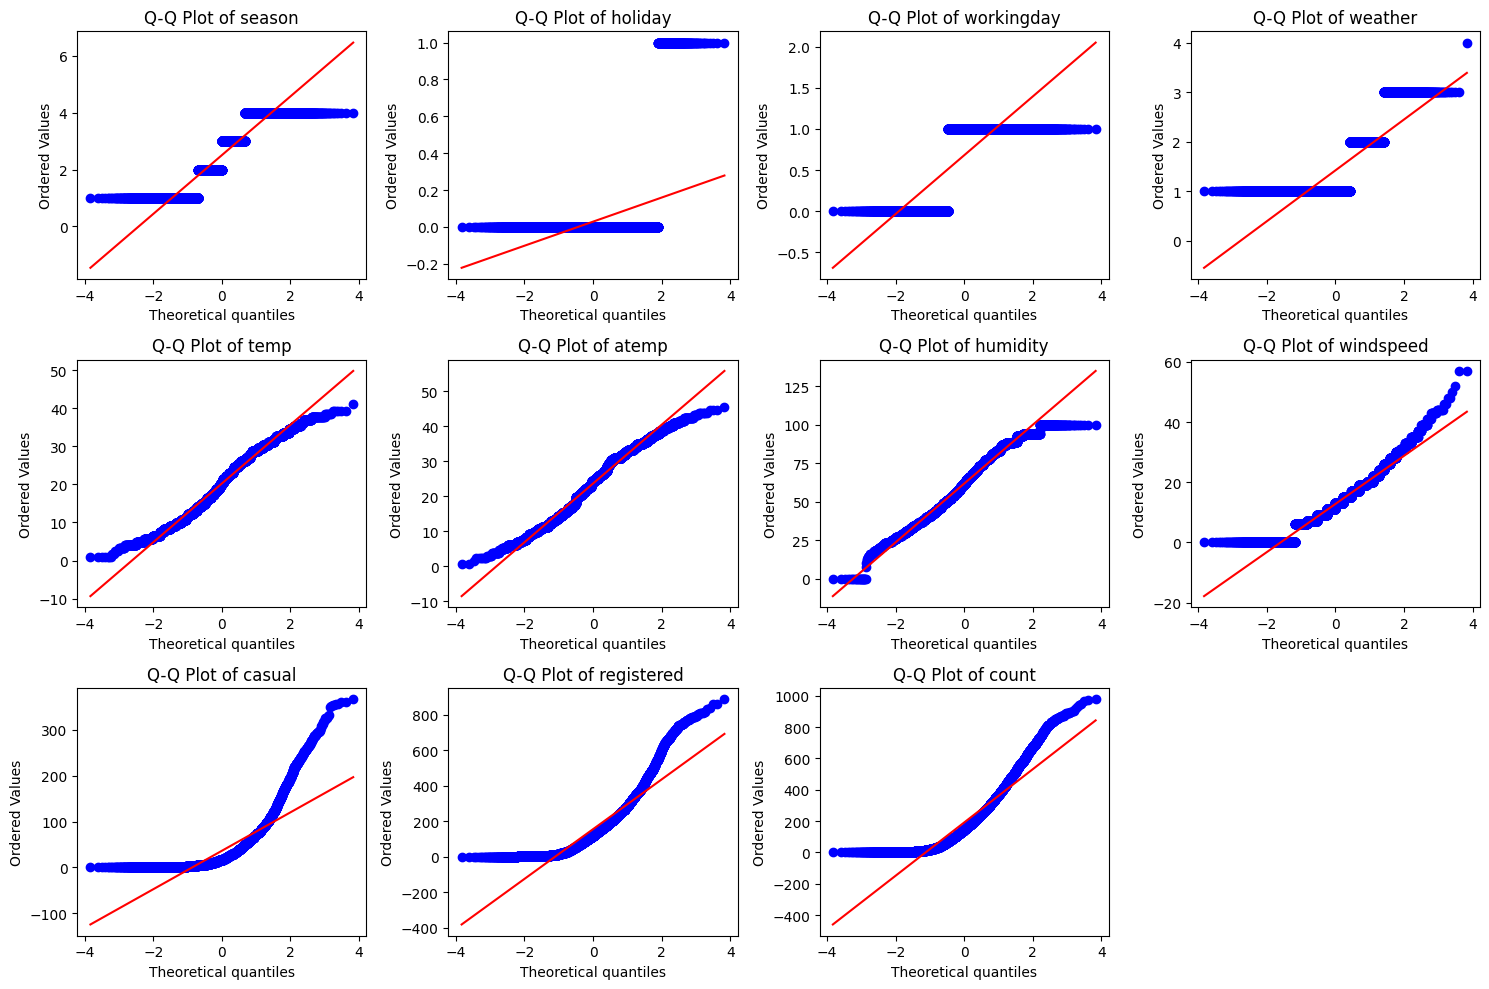

In [ ]:
plt.rcParams["figure.figsize"] = [15, 10]
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].plot(kind='density', subplots=True, layout=(4, 3), sharex=False)
plt.tight_layout()
plt.show()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot of {col}")
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

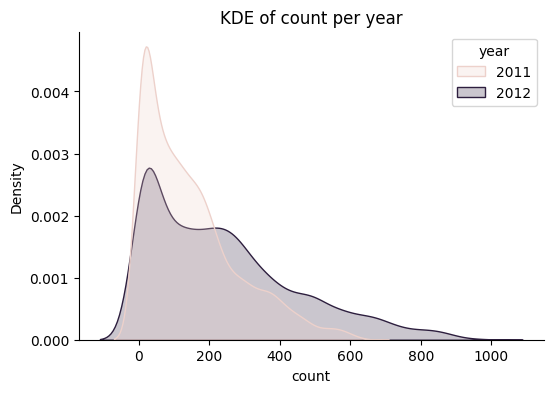

In [ ]:
fd = df.copy()
fd['datetime'] = pd.to_datetime(fd['datetime'], errors='coerce')
if 'year' not in fd.columns:
    fd['year'] = fd['datetime'].dt.year
plt.figure(figsize=(6, 4))
sns.kdeplot(data=fd, x="count", hue="year", fill=True, common_norm=False)
plt.title("KDE of count per year")
sns.despine()
plt.show()


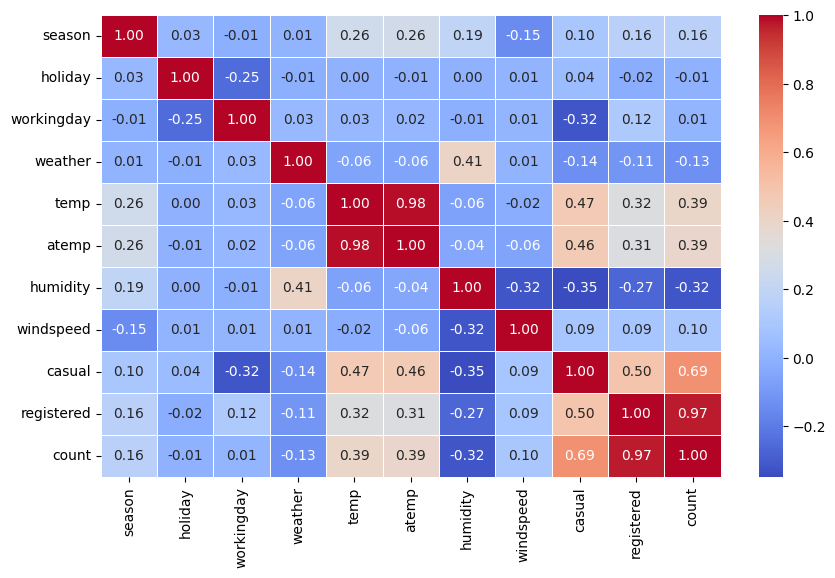

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [ ]:
fd = df.copy()
normal = []  # Normally distributed columns
not_normal = []  # Not normally distributed columns
numeric_columns = fd.select_dtypes(include=['float64', 'int64']).columns
for i in numeric_columns:
    test_statistic, p_value = shapiro(fd[i])
    if p_value > 0.05:
        normal.append((i, p_value))  # Append column name and p-value
    else:
        not_normal.append((i, p_value))  # Append column name and p-value
# Display results
print("Columns which follow the normality test:")
print(f"{'Column Name':<20} {'p_value':<10}")
for col, p in normal:
    print(f"{col:<20} {p:<10}")
print("\nColumns which don't follow the normality test:")
print(f"{'Column Name':<20} {'p_value':<10}")
for col, p in not_normal:
    print(f"{col:<20} {p:<10}")

Columns which follow the normality test:
Column Name          p_value   

Columns which don't follow the normality test:
Column Name          p_value   
season               2.250753004272159e-71
holiday              2.750007377026848e-113
workingday           3.6973374476160675e-95
weather              9.741630538083577e-91
temp                 4.4416921644612106e-36
atemp                3.220898326923054e-35
humidity             1.2220289155107286e-34
windspeed            7.590114681771609e-48
casual               3.5447963283866637e-87
registered           1.9729674093766246e-71
count                5.369837893115507e-68


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
fd = df.copy()
# Convert datetime to numerical features
if 'datetime' in fd.columns:
    fd['year'] = pd.to_datetime(fd['datetime']).dt.year
    fd['month'] = pd.to_datetime(fd['datetime']).dt.month
    fd['day'] = pd.to_datetime(fd['datetime']).dt.day
    fd['hour'] = pd.to_datetime(fd['datetime']).dt.hour
# Identify numeric columns (exclude 'datetime' if present)
numeric_columns = fd.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col != 'datetime']
# Analyze correlation between numeric columns and 'count'
correlation_results = []
for col in numeric_columns:
    pearson_coeff, p_val_pearson = pearsonr(fd[col], fd['count'])
    spearman_coeff, p_val_spearman = spearmanr(fd[col], fd['count'])

    if spearman_coeff > 0.5:
        strength = "Strong Positive"
    elif 0 < spearman_coeff <= 0.5:
        strength = "Weak Positive"
    elif spearman_coeff < -0.5:
        strength = "Strong Negative"
    else:
        strength = "Weak Negative"
    correlation_results.append({
        "Feature": col,
        "Pearson Coefficient": round(pearson_coeff, 2),
        "Spearman Coefficient": round(spearman_coeff, 2),
        "Correlation Strength": strength
    })
# Display results
print(f"{'Feature':<15} {'Pearson':<10} {'Spearman':<10} {'Strength':<20}")
print("-" * 60)
for result in correlation_results:
    print(f"{result['Feature']:<15} {result['Pearson Coefficient']:<10} {result['Spearman Coefficient']:<10} {result['Correlation Strength']:<20}")


Feature         Pearson    Spearman   Strength            
------------------------------------------------------------
season          0.16       0.18       Weak Positive       
holiday         -0.01      -0.0       Weak Negative       
workingday      0.01       -0.0       Weak Negative       
weather         -0.13      -0.11      Weak Negative       
temp            0.39       0.41       Weak Positive       
atemp           0.39       0.41       Weak Positive       
humidity        -0.32      -0.35      Weak Negative       
windspeed       0.1        0.14       Weak Positive       
casual          0.69       0.85       Strong Positive     
registered      0.97       0.99       Strong Positive     
count           1.0        1.0        Strong Positive     
year            0.26       0.22       Weak Positive       
month           0.17       0.18       Weak Positive       
day             0.02       0.02       Weak Positive       
hour            0.4        0.52       Strong Positive 

In [ ]:
Hfinal=[]
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
# Perform ANOVA to check if `count` differs across seasons
season_groups = [df[df['season'] == season]['count'] for season in df['season'].unique()]
f_stat, p_value = f_oneway(*season_groups)
print("ANOVA Test for Count Across Seasons")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:}")
if p_value < 0.05:
    Hfinal.append("Significant difference in counts on seasons.")
    print("Significant difference in counts on seasons.")
else:
    Hfinal.append("No significant difference in  counts on seasons.")
    print("No significant difference in  counts on seasons.")
# Perform ANOVA to check if `count` differs across weather conditions
weather_groups = [df[df['weather'] == weather]['count'] for weather in df['weather'].unique()]
f_stat_weather, p_value = f_oneway(*weather_groups)
print("\nANOVA Test for  Count Across Weather Conditions")
print(f"F-statistic: {f_stat_weather:.4f}, P-value: {p_value:}")
if p_value < 0.05:
    Hfinal.append("Significant difference in  counts on weather.")
    print("Significant difference in counts on weather.")
else:
    Hfinal.append("No significant difference in counts on weather.")
    print("No significant difference in counts on weather.")
# Hypothesis Test 1: Compare mean 'count' on working vs. non-working days
print("\nHypothesis Test 1: Mean 'count' on working vs. non-working days")
working_day_counts = df[df['workingday'] == 1]['count']
non_working_day_counts = df[df['workingday'] == 0]['count']
t_stat, p_value_ttest = stats.ttest_ind(working_day_counts, non_working_day_counts)
print(f"T-statistic: {t_stat}, P-value: {p_value_ttest}")
if p_value_ttest < 0.05:
    Hfinal.append("Significant difference in counts between working and non-working days.")
    print("Significant difference in counts between working and non-working days.")
else:
    Hfinal.append("No significant difference in counts between working and non-working days.")
    print("No significant difference in counts between working and non-working days.")
print("\n\n\n\n\n")


ANOVA Test for Count Across Seasons
F-statistic: 236.9467, P-value: 6.164843386499654e-149
Significant difference in counts on seasons.

ANOVA Test for  Count Across Weather Conditions
F-statistic: 65.5302, P-value: 5.482069475935669e-42
Significant difference in counts on weather.

Hypothesis Test 1: Mean 'count' on working vs. non-working days
T-statistic: 1.2096277376026694, P-value: 0.22644804226361348
No significant difference in counts between working and non-working days.








In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# ANOVA with 'season', 'weather', and other predictors
mod = smf.ols('count ~ C(season) + C(weather) + C(workingday) + temp + atemp + humidity + windspeed', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print("\nANOVA Table for season and weather")
print(anova_table)
# Conclusion for season and weather ANOVA
for predictor in anova_table.index:
    p_val = anova_table.loc[predictor, 'PR(>F)']
    if p_val < 0.05:
        print(f"'{predictor}' significantly affects count (p-value = {p_val:}).")
    else:
        print(f"'{predictor}' does not significantly affect count (p-value = {p_val:}).")
print("-" * 100)
# ANOVA for 'holiday'
mod_holiday = smf.ols('count ~ C(holiday)', data=df).fit()
anova_table_holiday = sm.stats.anova_lm(mod_holiday, typ=2)
print("\nANOVA Table for Holiday")
print(anova_table_holiday)
# Conclusion for holiday ANOVA
for predictor in anova_table_holiday.index:
    p_val = anova_table_holiday.loc[predictor, 'PR(>F)']
    if p_val < 0.05:
        print(f"'{predictor}' significantly affects count (p-value = {p_val:.4f}).")
    else:
        print(f"'{predictor}' does not significantly affect count(p-value = {p_val:.4f}).")


ANOVA Table for season and weather
                     sum_sq       df           F         PR(>F)
C(season)      1.116609e+07      3.0  156.661672   2.078345e-99
C(weather)     5.579383e+05      3.0    7.827949   3.238650e-05
C(workingday)  8.114691e+03      1.0    0.341551   5.589477e-01
temp           1.060382e+06      1.0   44.631893   2.494041e-11
atemp          1.686916e+05      1.0    7.100298   7.718488e-03
humidity       2.144266e+07      1.0  902.529977  1.474095e-190
windspeed      2.121423e+05      1.0    8.929153   2.812812e-03
Residual       2.583487e+08  10874.0         NaN            NaN
'C(season)' significantly affects count (p-value = 2.07834477082079e-99).
'C(weather)' significantly affects count (p-value = 3.238649533783286e-05).
'C(workingday)' does not significantly affect count (p-value = 0.558947669281368).
'temp' significantly affects count (p-value = 2.4940409592377622e-11).
'atemp' significantly affects count (p-value = 0.007718488060335846).
'humidity' sig

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
# Grouping count by season, holiday, workingday, and weather
grouped_by_season = [df[df['season'] == season]['count'] for season in df['season'].unique()]
grouped_by_holiday = [df[df['holiday'] == holiday]['count'] for holiday in df['holiday'].unique()]
grouped_by_workingday = [df[df['workingday'] == workingday]['count'] for workingday in df['workingday'].unique()]
grouped_by_weather = [df[df['weather'] == weather]['count'] for weather in df['weather'].unique()]
# Conducting ANOVA
anova_season = f_oneway(*grouped_by_season)
anova_holiday = f_oneway(*grouped_by_holiday)
anova_workingday = f_oneway(*grouped_by_workingday)
anova_weather = f_oneway(*grouped_by_weather)
# Results
anova_results = {
    'Season': anova_season,
    'Holiday': anova_holiday,
    'Working Day': anova_workingday,
    'Weather': anova_weather,
}
anova_results

{'Season': F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149),
 'Holiday': F_onewayResult(statistic=0.3165625276833693, pvalue=0.5736923883252254),
 'Working Day': F_onewayResult(statistic=1.4631992635777575, pvalue=0.22644804226428558),
 'Weather': F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)}

In [ ]:
#seasons and weather have significant difference in count
from scipy.stats import ttest_ind
# Grouping data
holiday_groups = [df[df['holiday'] == 0]['count'], df[df['holiday'] == 1]['count']]
workingday_groups = [df[df['workingday'] == 0]['count'], df[df['workingday'] == 1]['count']]
# t-tests
t_test_holiday = ttest_ind(holiday_groups[0], holiday_groups[1], equal_var=False)  # Welch's t-test
t_test_workingday = ttest_ind(workingday_groups[0], workingday_groups[1], equal_var=False)  # Welch's t-test

t_test_results = {
    'Holiday': t_test_holiday,
    'Working Day': t_test_workingday
}
t_test_results

{'Holiday': TtestResult(statistic=0.6041892778480382, pvalue=0.5461309933605478, df=331.56021469808337),
 'Working Day': TtestResult(statistic=-1.2362580418223226, pvalue=0.21640312280695098, df=7176.288413844308)}

In [ ]:
#Neither holidays nor working days significantly affect counts, as indicated by the high p-values in the t-tests.
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['weather'], df['holiday'])
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
# results
print("Chi-square Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-square Test Statistic: 5.406882723976633
p-value: 0.1443153629276037
Degrees of Freedom: 3
Expected Frequencies:
 [[6.98653316e+03 2.05466838e+02]
 [2.75303601e+03 8.09639904e+01]
 [8.34459397e+02 2.45406026e+01]
 [9.71431196e-01 2.85688040e-02]]


In [ ]:
#There is no statistically significant association between weather and holidays in the given dataset.

In [ ]:
# compare mean 'count' on working vs. non-working days
print("\nHypothesis Test 1: Mean 'count' on working vs. non-working days")
working_day_counts = df[df['workingday'] == 1]['count']
non_working_day_counts = df[df['workingday'] == 0]['count']
t_stat, p_value_ttest = stats.ttest_ind(working_day_counts, non_working_day_counts)
print(f"T-statistic: {t_stat}, P-value: {p_value_ttest}")
if p_value_ttest < 0.05:
    print("Significant difference in counts between working and non-working days.")
else:
    print("No significant difference in counts between working and non-working days.")
# Further analysis using ANOVA with interaction
# This helps determine if the effect of workingday depends on other factors like season or weather
mod_interaction = smf.ols('count ~ C(workingday) * C(season) + C(workingday) * C(weather)', data=df).fit()
anova_table_interaction = sm.stats.anova_lm(mod_interaction, typ=2)
print("\nANOVA Table with interaction between workingday, season, and weather")
anova_table_interaction


Hypothesis Test 1: Mean 'count' on working vs. non-working days
T-statistic: 1.2096277376026694, P-value: 0.22644804226361348
No significant difference in counts between working and non-working days.

ANOVA Table with interaction between workingday, season, and weather


,sum_sq,df,F,PR(>F)
C(workingday),9.608369e+04,1.0,3.177254,7.469801e-02
C(season),2.158830e+07,3.0,237.957500,1.501854e-149
C(weather),6.062354e+06,3.0,66.822436,8.254296e-43
C(workingday):C(season),2.188307e+05,3.0,2.412067,6.479820e-02
C(workingday):C(weather),1.224266e+05,3.0,1.349450,2.563505e-01
Residual,3.288116e+08,10873.0,NaN,NaN


In [ ]:
mod = smf.ols('count ~ C(season) + C(weather) + C(workingday) + temp + atemp + humidity + windspeed', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print("\nANOVA Table for season and weather")
print(anova_table)
# Check for significance based on p-values in the ANOVA table
alpha = 0.05  # Significance level
print("\nInterpretation:")
for col in ['season', 'weather']:
  if anova_table.loc[f'C({col})', 'PR(>F)'] < alpha:
    print(f"There is a significant difference in the number of count across different {col} categories.")
  else:
    print(f"There is no significant difference in the number of count across different {col} categories.")


ANOVA Table for season and weather
                     sum_sq       df           F         PR(>F)
C(season)      1.116609e+07      3.0  156.661672   2.078345e-99
C(weather)     5.579383e+05      3.0    7.827949   3.238650e-05
C(workingday)  8.114691e+03      1.0    0.341551   5.589477e-01
temp           1.060382e+06      1.0   44.631893   2.494041e-11
atemp          1.686916e+05      1.0    7.100298   7.718488e-03
humidity       2.144266e+07      1.0  902.529977  1.474095e-190
windspeed      2.121423e+05      1.0    8.929153   2.812812e-03
Residual       2.583487e+08  10874.0         NaN            NaN

Interpretation:
There is a significant difference in the number of count across different season categories.
There is a significant difference in the number of count across different weather categories.


In [ ]:
def kruskal_wallis_test(df, column_name):
    groups = [df[df[column_name] == category]['count'] for category in df[column_name].unique()]
    h_statistic, p_value = stats.kruskal(*groups)
    print(f"Kruskal-Wallis H-test for {column_name}:")
    print(f"H-statistic: {h_statistic:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Significant difference in counts across {column_name} categories.")
    else:
        print(f"No significant difference in counts across {column_name} categories.")
kruskal_wallis_test(df, 'season')
kruskal_wallis_test(df, 'weather')
kruskal_wallis_test(df, 'holiday')
kruskal_wallis_test(df, 'workingday')

Kruskal-Wallis H-test for season:
H-statistic: 699.6669, P-value: 0.0000
Significant difference in counts across season categories.
Kruskal-Wallis H-test for weather:
H-statistic: 205.0022, P-value: 0.0000
Significant difference in counts across weather categories.
Kruskal-Wallis H-test for holiday:
H-statistic: 0.0291, P-value: 0.8646
No significant difference in counts across holiday categories.
Kruskal-Wallis H-test for workingday:
H-statistic: 0.0016, P-value: 0.9679
No significant difference in counts across workingday categories.


In [ ]:
season_groups = [df[df['season'] == season]['count'] for season in df['season'].unique()]
f_stat, p_value = f_oneway(*season_groups)
print("ANOVA Test for Bike Count Across Seasons")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:}")
if p_value < 0.05:
    print("Significant difference in counts across seasons.")
else:
    print("No significant difference in counts across seasons.")

ANOVA Test for Bike Count Across Seasons
F-statistic: 236.9467, P-value: 6.164843386499654e-149
Significant difference in counts across seasons.


In [ ]:
"""
### **Business Insights**

- **Seasonal Patterns**:
  - Maximum counts occur during summer; minimum counts are observed in winter.

- **Conditions Impact**:
  - Clear weather correlates with the highest counts, while counts decrease sharply in rain, thunderstorms, snow, or fog.
  - Humidity, windspeed, temperature, and weather significantly impact counts and correlate with seasons.

- **Temperature Influence**:
  - Lower temperatures result in lower counts, while counts increase with rising temperatures.

- **Time-of-Day Trends**:
  - Peak counts occur during the day and decline at night, indicating predictable daily fluctuations.

- **Holiday and Working Day Dynamics**:
  - Counts are lower on holidays and weekends, with a slight demand increase on non-working days.
  - Overall counts are similar on working and non-holiday days.

- **User Type Behavior**:
  - Casual riders dominate on weekends, whereas registered users are more active on working days.

- **Yearly Growth and User Composition**:
  - Hourly counts have grown significantly from 2011 to 2012.
  - 19% of users are casual, and 81% are registered.

- **Monthly and Daily Usage Patterns**:
  - Peak demand is observed in spring and summer, with a decline in fall and winter.
  - January through March has the lowest counts, with afternoon peaks observed daily.

- **Weather Impact on Usage**:
  - Clear and partly cloudy weather conditions are associated with higher counts.
  - Extreme weather conditions have limited data representation.

- **Correlations**:
  - Strong positive correlation between temperature and perceived temperature.
  - Registered users strongly correlate with total count.
  - Weather-related factors have limited correlation with counts.

- **Statistical Significance**:
  - ANOVA tests confirm the impact of seasons and weather on counts.
  - 2-sample t-tests show limited impact of working vs. non-working days.
  - Chi-square tests confirm weather dependency on seasons.

---

### **Summary of Hypotheses**

1. **Effect of Working Day on Total Count**:
   - Mean hourly counts are statistically similar for working and non-working days.

2. **Effect of Holidays on Total Count**:
   - Counts are statistically dependent on weather and season.

3. **Weather Dependency on Seasons**:
   - Counts are statistically different across various weather conditions.

4. **Count Similarity Across Weather Types**:
   - Weather types 1, 2, and 3 do not show statistically significant dependency on season based on average hourly counts.

5. **Count Variation Across Seasons**:
   - Counts are statistically different for each season.

---

### **Strategic Recommendations for Profitable Growth**

- **Optimize Deployment in Peak Months**:
  - Focus resource allocation during high-demand months (June, July, and August).

- **Seasonal Marketing Strategies**:
  - Promote services aggressively during spring and summer to capitalize on high demand.

- **Enhance Engagement in Off-Peak Months**:
  - Implement discounts and promotions from January to March to maintain consistent usage.

- **Weather-Responsive Pricing**:
  - Introduce dynamic pricing strategies during extreme weather to optimize revenue.

- **Diversify Revenue Streams**:
  - Explore partnerships, sponsorships, and premium memberships to expand income sources.

- **Adapt to Weather Conditions**:
  - Offer tailored promotions or discounts based on specific weather scenarios (e.g., rainy-day deals).

- **Combine Seasonal and Weather Strategies**:
  - Align bike availability with both seasonal and weather trends to ensure sufficient supply.

- **Promote Differently by Season**:
  - Highlight season-specific promotions, such as summer campaigns in peak months.

---
"""